# ISEL - CPS 
## Semestre 2022/23
# <br>
###  <center> Trabalho Prático 2 Parte B </center>
# </br>


Trabalho realizado por:
* Bárbara Jesus, numero <b> 45108 </b>
* João Fernandes, numero <b> 47478 </b>
* Duarte Afonso, numero <b> 47736 </b>

<b> Turma L33D - Docente Michele Mengucci</b>

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as scisig

In [239]:
path_sons = './sons/'
file = 'fonte_mov.wav'
Fs, data = wav.read(path_sons + file)

In [240]:
def getAudioAng(som, Fs):
    canal_L = np.asarray(som[:, 0], dtype = np.int64)
    canal_R = np.asarray(som[:, 1], dtype = np.int64)
    # Correlação entre os dois canais de audio (esquerdo e direito)
    correlacao = scisig.correlate(canal_L, canal_R, mode = 'full')
    # Delay entre os dois canais de audio (samples)
    atrasoSamples = np.argmax(correlacao) - len(canal_L) + 1
    # Delay entre os dois canais de audio (segundos)
    atrasoSec = atrasoSamples / Fs
    # Velocidade do som
    c = 343
    # Distância entre ouvidos
    d = 0.18
    # Ângulo estimado da fonte sonora
    teta_rad = np.arcsin(atrasoSec * c / d)
    teta_degrees = teta_rad / np.pi * 180
    return teta_rad, teta_degrees

(-1.4, 1.4, -1.2, 1.2)

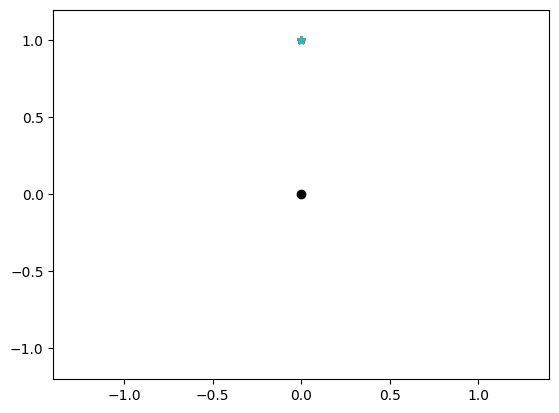

In [241]:
tempSegmento = .25
samplesSegmento = Fs * tempSegmento

angs = np.empty
coorX = np.empty
coorY = np.empty

# Distância à fonte sonora
D = 1

#corr = scisig.correlate(np.asarray(data[0:samplesSegmento, 0], dtype=np.int64), np.asarray(data[0:samplesSegmento, 1], dtype=np.int64), mode='full')
#print(np.max(corr), np.min(corr))
#plt.plot(corr)
#
#sample_L = data[0:samplesSegmento, 0]
#sample_R = data[0:samplesSegmento, 1]
#sample = np.array([sample_L, sample_R])
#sample = np.transpose(sample)
#corr = scisig.correlate(np.asarray(sample[:, 0], dtype=np.int64), np.asarray(sample[:, 1], dtype=np.int64), mode='full')
#print(np.max(corr), np.min(corr))
#plt.plot(corr)

for i in np.arange(0, len(data[:, 0]) / samplesSegmento):
    sample_L = data[int(i*samplesSegmento):int((i+1)*samplesSegmento), 0]
    sample_R = data[int(i*samplesSegmento):int((i+1)*samplesSegmento), 1]
    sample = np.array([sample_L, sample_R])
    
    ang_rad_sample = getAudioAng(sample.T, Fs)[0]
    angs = np.append(angs, ang_rad_sample)
    coorX = np.append(coorX, D * np.cos(ang_rad_sample))
    coorY = np.append(coorY, D * np.sin(ang_rad_sample))
    
angs = angs[1:]
coorX = coorX[1:]
coorY = coorY[1:]

for i in range(len(coorX)):
    plt.plot(coorY[i], coorX[i], '*')
plt.plot(0, 0, 'ok')
plt.axis([-1.4, 1.4, -1.2, 1.2])

# Questão 2


In [242]:
path_sons = './sons/'
file = 'binaural_ITD_c_Questao1.wav'
Fs, data = wav.read(path_sons + file)

In [ ]:
campo_direto = data[:, 0]